In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from minisom import MiniSom
import matplotlib.pylab as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

In [3]:
df = pd.read_csv('../data.csv', index_col=0)
df_scaled = pd.read_csv('../preprocessed_data.csv', index_col=0)
df_scaled.drop(['ID'], axis=1, inplace=True)

In [29]:
pca  = PCA(n_components=5)
pca_res = pca.fit_transform(df_scaled)
print(pca.explained_variance_)
df_pca5 = pd.DataFrame(pca_res, columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5'])

[0.77027329 0.26559467 0.17640023 0.10656711 0.07643478]


In [30]:
som_est = MiniSom(3, 3, 5, sigma=0.5)
som_est.random_weights_init(df_pca5.values)

0.11164663275912277


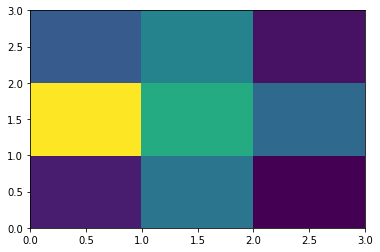

In [31]:
som_est.train_random(df_pca5.values, 100)
quantization = som_est.quantization(df_pca5.values)
labels = []
for i in range(df_pca5.values.shape[0]):
    x = df_pca5.values[i]
    t1, t2 = som_est.winner(x)
    labels.append(t1*2+t2)
plt.pcolor(som_est.distance_map().T)
plt.savefig('../distance_map_som')
print(silhouette_score(df_pca5, labels))

In [20]:
colors = ['black', 'darkgreen', 'red', 'blue',
         'grey', 'cyan', 'blue', 'navy',
         'pink', 'orange', 'orchid']

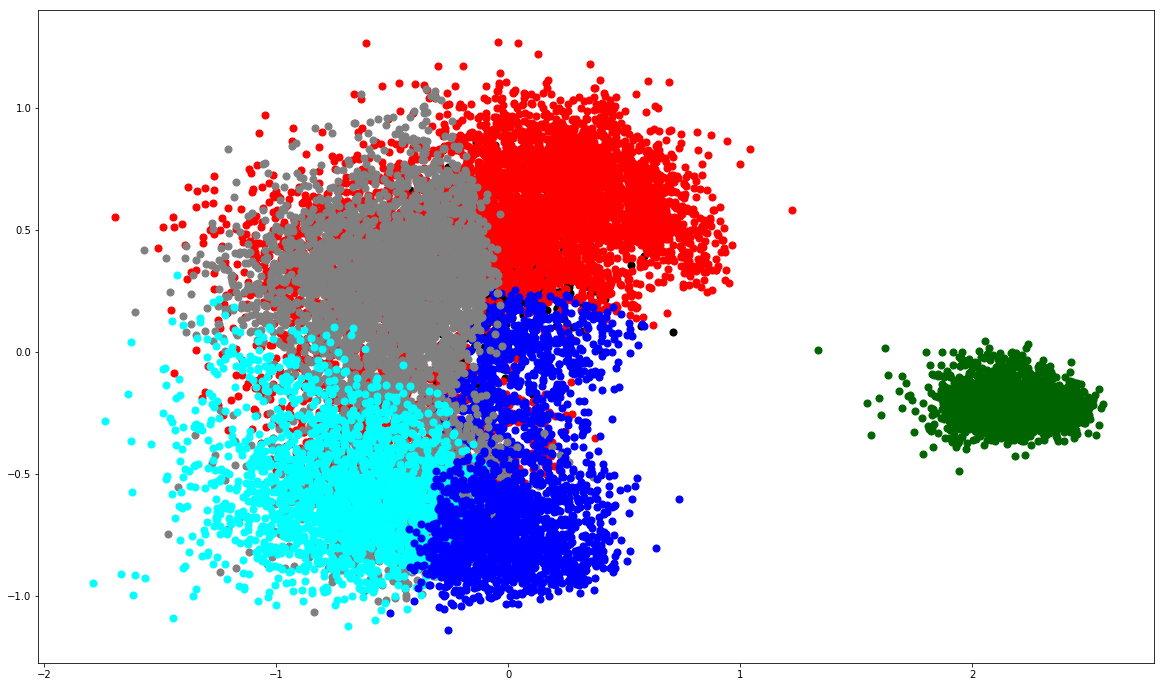

In [32]:
fig = plt.figure(figsize=(20,12))
df_pca5['Labels'] = labels
for j in range(max(labels)+1):
    cluster = df_pca5[df_pca5['Labels'] == j]
    plt.scatter(cluster['pca1'], cluster['pca2'], color=colors[j], s=50)
plt.savefig('../som_pca5')